## Import Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Daily Stock Prices

In [2]:
AAPL_daily = pd.read_csv("AAPL_daily.csv")
# pd.to_datetime(AAPL_daily["Date"],format="%Y-%m-%d")
# AAPL_daily.index = AAPL_daily["Date"]
AAPL_daily = AAPL_daily.set_index('Date')
AAPL_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,0.376116,0.377232,0.357143,0.368304,0.314470,952884800
1999-01-05,0.374442,0.392299,0.370536,0.386719,0.330193,1410113600
1999-01-06,0.393973,0.393973,0.366071,0.372768,0.318281,1348569600
1999-01-07,0.377232,0.402344,0.376116,0.401786,0.343058,1429019200
1999-01-08,0.415737,0.418527,0.392857,0.401786,0.343058,678832000


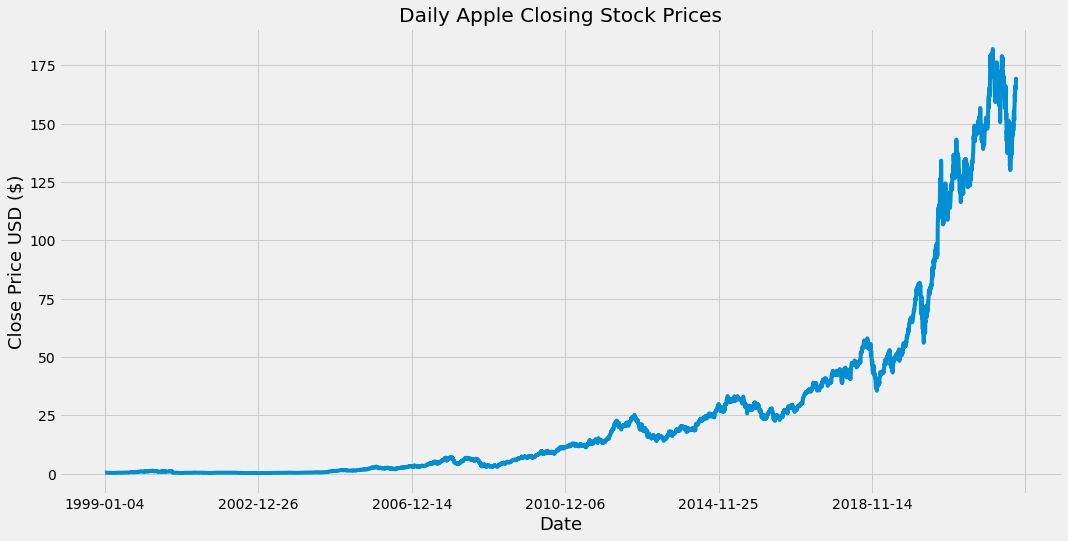

In [3]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
AAPL_daily['Close'].plot(title="Daily Apple Closing Stock Prices")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
MSFT_daily = pd.read_csv("MSFT_daily.csv")
MSFT_daily = MSFT_daily.set_index('Date')
MSFT_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,34.902344,36.31250,34.843750,35.25000,22.156555,69305200
1999-01-05,35.468750,37.00000,35.359375,36.62500,23.020824,64281600
1999-01-06,37.375000,37.87500,36.687500,37.81250,23.767221,69064800
1999-01-07,37.437500,37.65625,37.062500,37.62500,23.649382,51150400
1999-01-08,38.046875,38.12500,36.750000,37.46875,23.551167,50244800


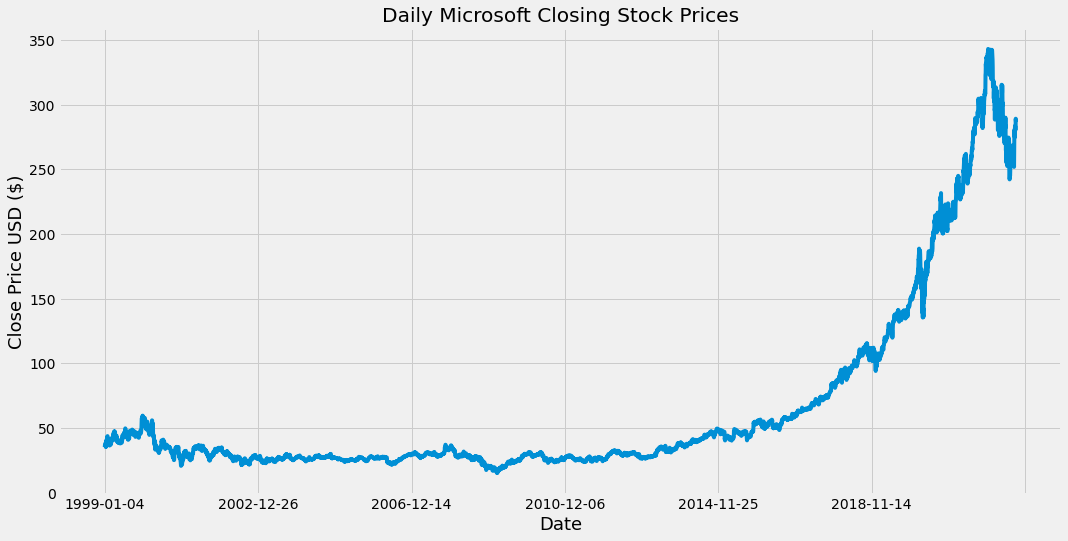

In [5]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
MSFT_daily['Close'].plot(title="Daily Microsoft Closing Stock Prices")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
META_daily = pd.read_csv("META_daily.csv")
META_daily = META_daily.set_index('Date')
META_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800


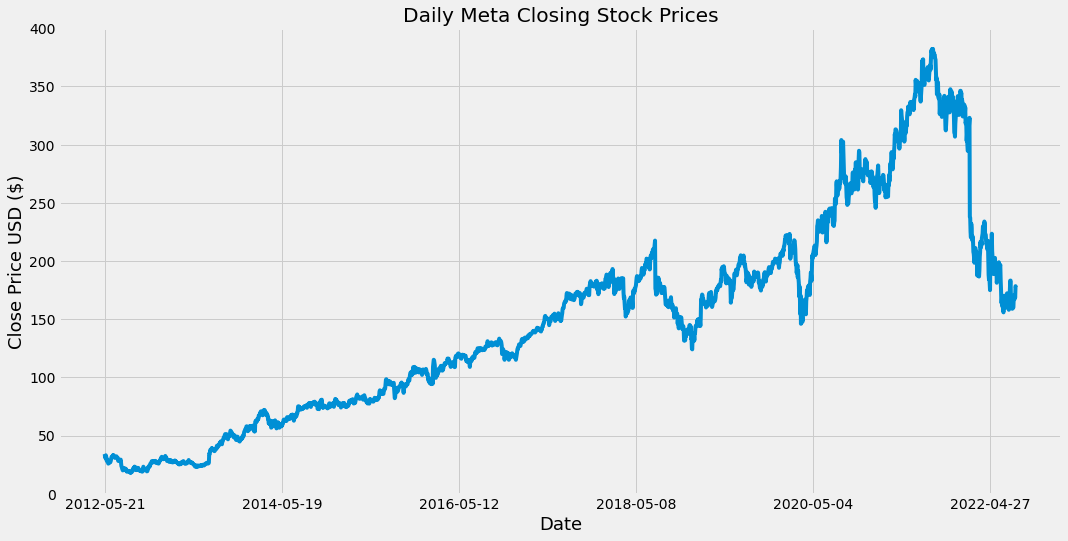

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
META_daily['Close'].plot(title="Daily Meta Closing Stock Prices")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Weekly data

In [8]:
AAPL_weekly = pd.read_csv("AAPL_weekly.csv")
AAPL_weekly = AAPL_weekly.set_index('Date')
AAPL_weekly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-01,0.376116,0.402344,0.357143,0.401786,0.343058,5140587200
1999-01-08,0.415737,0.422433,0.366629,0.369420,0.315423,4832217600
1999-01-15,0.373326,0.377790,0.334821,0.346540,0.295887,2919504000
1999-01-22,0.336496,0.369420,0.330915,0.364955,0.311610,1992379200
1999-01-29,0.367746,0.374442,0.337054,0.338170,0.288740,1631313600


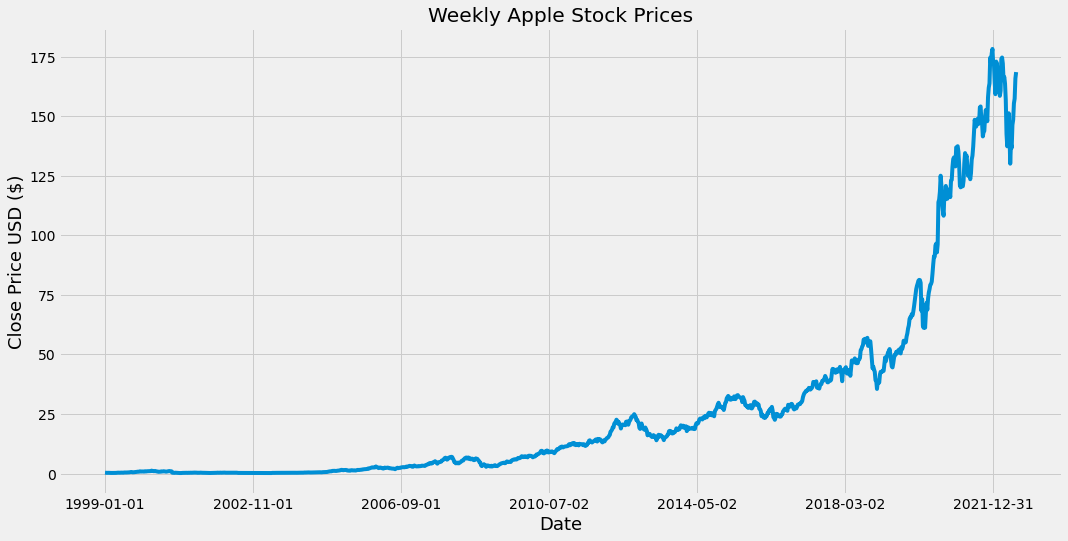

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
AAPL_weekly['Close'].plot(title="Weekly Apple Stock Prices")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [10]:
MSFT_weekly = pd.read_csv("MSFT_weekly.csv")
MSFT_weekly = MSFT_weekly.set_index('Date')
MSFT_weekly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-01,34.902344,37.875000,34.84375,37.625000,23.649382,253802000
1999-01-08,38.046875,38.125000,34.00000,35.437500,22.274410,289175200
1999-01-15,35.734375,41.937500,35.34375,39.578125,24.877031,367644000
1999-01-22,38.906250,43.609375,38.81250,43.500000,27.342138,482326000
1999-01-29,43.687500,43.984375,39.71875,39.765625,24.994884,416167200


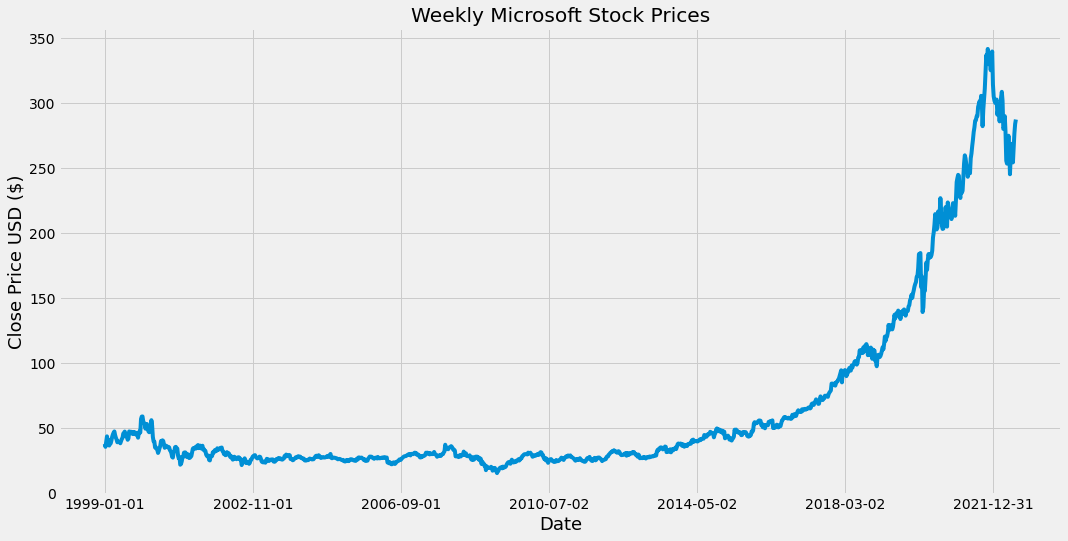

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
MSFT_weekly['Close'].plot(title="Weekly Microsoft Stock Prices")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [12]:
META_weekly = pd.read_csv("META_weekly.csv")
META_weekly = META_weekly.set_index('Date')
META_weekly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-14,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,30.940001,31.910000,31.910000,430966300
2012-05-28,31.480000,31.690001,26.830000,27.719999,27.719999,288826000
2012-06-04,27.200001,27.760000,25.520000,27.100000,27.100000,203386400
2012-06-11,27.180000,30.100000,26.840000,30.010000,30.010000,121558000


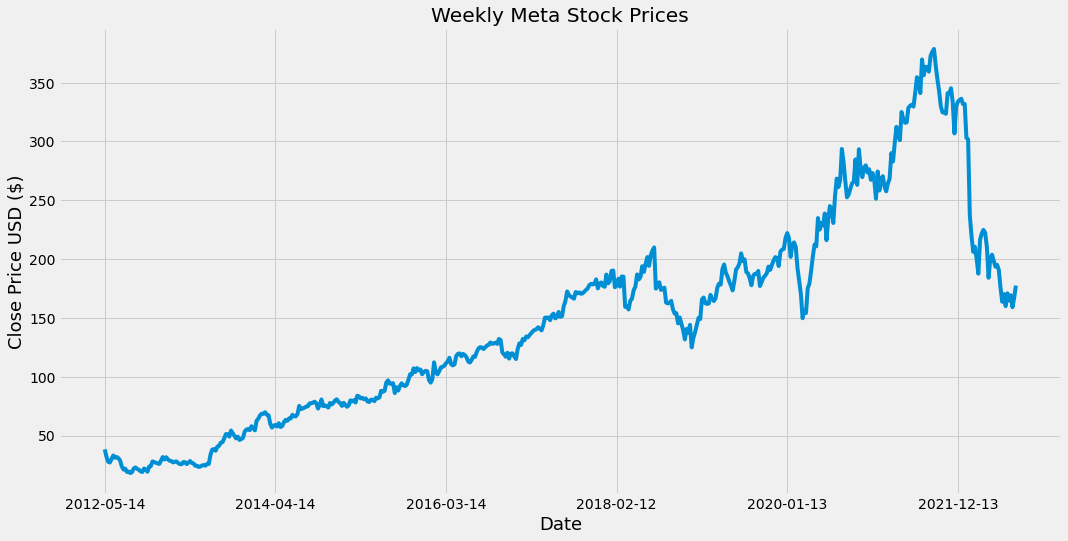

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
META_weekly['Close'].plot(title="Weekly Meta Stock Prices")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Monthly data

In [14]:
AAPL_monthly = pd.read_csv("AAPL_monthly.csv")
AAPL_monthly = AAPL_monthly.set_index('Date')
AAPL_monthly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-01,0.376116,0.422433,0.330915,0.367746,0.313993,15127403200
1999-02-01,0.372210,0.374442,0.308036,0.310826,0.265393,8116516800
1999-03-01,0.310826,0.331473,0.285714,0.320871,0.273970,9951995200
1999-04-01,0.321987,0.420759,0.299107,0.410714,0.350681,15888969600
1999-05-01,0.411272,0.446429,0.365513,0.393415,0.335910,8908905600


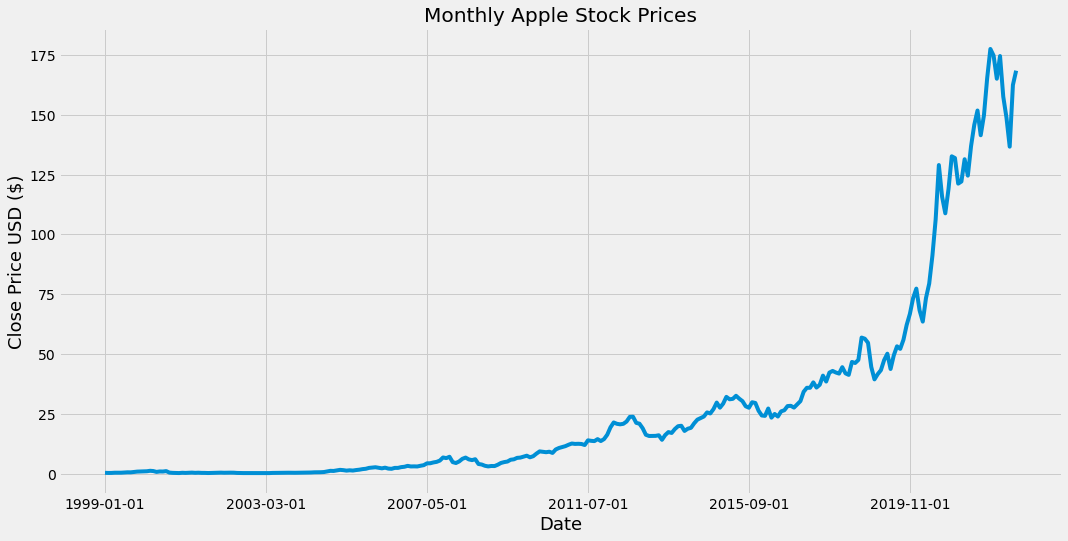

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
AAPL_monthly['Close'].plot(title="Monthly Apple Stock Prices")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [16]:
MSFT_monthly = pd.read_csv("MSFT_monthly.csv")
MSFT_monthly = MSFT_monthly.set_index('Date')
MSFT_monthly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-01,34.902344,43.781250,34.000000,43.75000,27.499289,1472518800
1999-02-01,43.859375,43.984375,35.996094,37.53125,23.590462,1599103200
1999-03-01,37.390625,47.312500,36.765625,44.81250,28.167118,1569410000
1999-04-01,45.625000,47.812500,39.937500,40.65625,25.554686,1163599400
1999-05-01,40.718750,40.906250,37.750000,40.34375,25.358263,1124257000


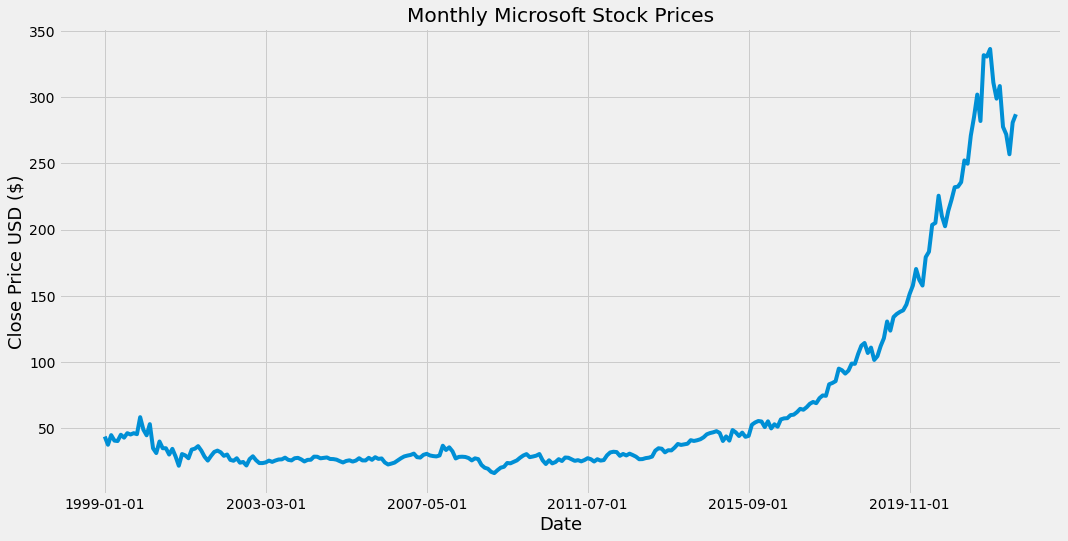

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
MSFT_monthly['Close'].plot(title="Monthly Microsoft Stock Prices")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [18]:
META_monthly = pd.read_csv("META_monthly.csv")
META_monthly = META_monthly.set_index('Date')
META_monthly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-01,28.889999,33.450001,25.520000,31.100000,31.100000,667910500
2012-07-01,31.250000,32.880001,21.610001,21.709999,21.709999,520189700
2012-08-01,21.500000,22.450001,18.030001,18.059999,18.059999,1151944900
2012-09-01,18.080000,23.370001,17.549999,21.660000,21.660000,1058643700
2012-10-01,22.080000,24.250000,18.799999,21.110001,21.110001,1100938300


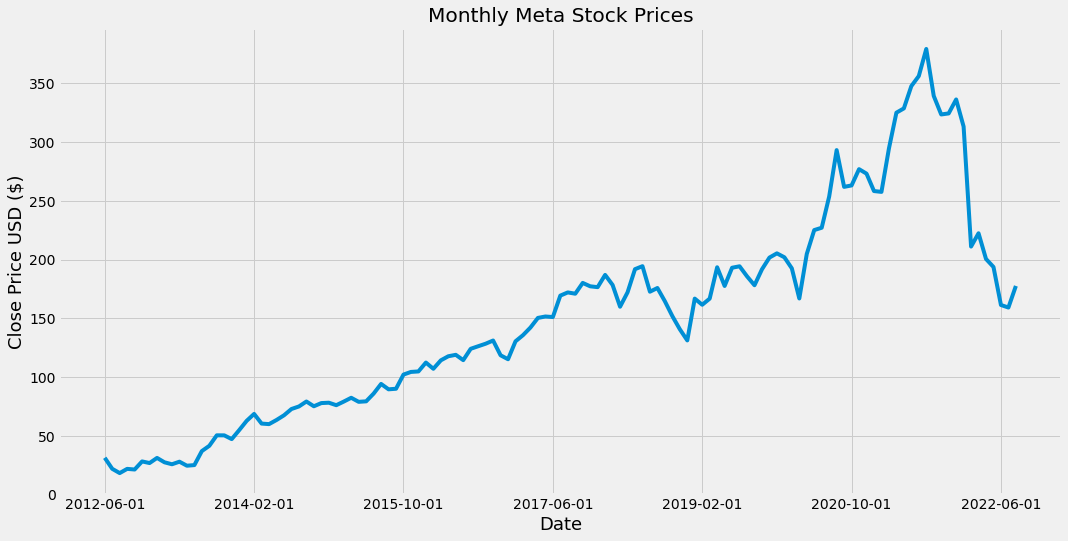

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
META_monthly['Close'].plot(title="Monthly Meta Stock Prices")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Sorting & Standardizing the datasets

In [20]:
# Creating a new dataframe with only the 'Close' column
AAPL_daily_data, MSFT_daily_data, META_daily_data = AAPL_daily.filter(['Close']), MSFT_daily.filter(['Close']), META_daily.filter(['Close'])
AAPL_weekly_data, MSFT_weekly_data, META_weekly_data = AAPL_weekly.filter(['Close']), MSFT_weekly.filter(['Close']), META_weekly.filter(['Close'])
AAPL_monthly_data, MSFT_monthly_data, META_monthly_data = AAPL_monthly.filter(['Close']), MSFT_monthly.filter(['Close']), META_monthly.filter(['Close'])
# Converting the dataframe to a numpy array
AAPL_daily_dataset, MSFT_daily_dataset, META_daily_dataset = AAPL_daily_data.values, MSFT_daily_data.values, META_daily_data.values
AAPL_weekly_dataset, MSFT_weekly_dataset, META_weekly_dataset = AAPL_weekly_data.values, MSFT_weekly_data.values, META_weekly_data.values
AAPL_monthly_dataset, MSFT_monthly_dataset, META_monthly_dataset = AAPL_monthly_data.values, MSFT_monthly_data.values, META_monthly_data.values

# Get/Compute the number of rows to train the daily models on
training_AAPL_daily_data_len = math.ceil( len(AAPL_daily_dataset) *.8)
training_MSFT_daily_data_len = math.ceil( len(MSFT_daily_dataset) *.8)
training_META_daily_data_len = math.ceil( len(META_daily_dataset) *.8)
# Get/Compute the number of rows to train the weekly models on
training_AAPL_weekly_data_len = math.ceil( len(AAPL_weekly_dataset) *.8)
training_MSFT_weekly_data_len = math.ceil( len(MSFT_weekly_dataset) *.8)
training_META_weekly_data_len = math.ceil( len(META_weekly_dataset) *.8)
# Get/Compute the number of rows to train the monthly models on
training_AAPL_monthly_data_len = math.ceil( len(AAPL_monthly_dataset) *.8)
training_MSFT_monthly_data_len = math.ceil( len(MSFT_monthly_dataset) *.8)
training_META_monthly_data_len = math.ceil( len(META_monthly_dataset) *.8)

In [21]:
# here we are scaling the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_AAPL_daily_data, scaled_MSFT_daily_data, scaled_META_daily_data = scaler.fit_transform(AAPL_daily_dataset), scaler.fit_transform(MSFT_daily_dataset), scaler.fit_transform(META_daily_dataset)
scaled_AAPL_weekly_data, scaled_MSFT_weekly_data, scaled_META_weekly_data = scaler.fit_transform(AAPL_weekly_dataset), scaler.fit_transform(MSFT_weekly_dataset), scaler.fit_transform(META_weekly_dataset)
scaled_AAPL_monthly_data, scaled_MSFT_monthly_data, scaled_META_monthly_data = scaler.fit_transform(AAPL_monthly_dataset), scaler.fit_transform(MSFT_monthly_dataset), scaler.fit_transform(META_monthly_dataset)

In [22]:
#Creating the daily scaled training data set
train_AAPL_daily_data = scaled_AAPL_daily_data[0:training_AAPL_daily_data_len  , : ]
train_MSFT_daily_data = scaled_MSFT_daily_data[0:training_MSFT_daily_data_len  , : ]
train_META_daily_data = scaled_META_daily_data[0:training_META_daily_data_len  , : ]
#Creating the weekly scaled training data set
train_AAPL_weekly_data = scaled_AAPL_weekly_data[0:training_AAPL_weekly_data_len  , : ]
train_MSFT_weekly_data = scaled_MSFT_weekly_data[0:training_MSFT_weekly_data_len  , : ]
train_META_weekly_data = scaled_META_weekly_data[0:training_META_weekly_data_len  , : ]
#Creating the monthly scaled training data set
train_AAPL_monthly_data = scaled_AAPL_monthly_data[0:training_AAPL_monthly_data_len  , : ]
train_MSFT_monthly_data = scaled_MSFT_monthly_data[0:training_MSFT_monthly_data_len  , : ]
train_META_monthly_data = scaled_META_monthly_data[0:training_META_monthly_data_len  , : ]

#Spliting the daily data into x_train and y_train data sets
X_train_AAPL_daily, y_train_AAPL_daily = [], []
for i in range(60,len(train_AAPL_daily_data)):
    X_train_AAPL_daily.append(train_AAPL_daily_data[i-60:i,0])
    y_train_AAPL_daily.append(train_AAPL_daily_data[i,0])
X_train_MSFT_daily, y_train_MSFT_daily = [], []
for i in range(60,len(train_MSFT_daily_data)):
    X_train_MSFT_daily.append(train_MSFT_daily_data[i-60:i,0])
    y_train_MSFT_daily.append(train_MSFT_daily_data[i,0])  
X_train_META_daily, y_train_META_daily = [], []
for i in range(60,len(train_META_daily_data)):
    X_train_META_daily.append(train_META_daily_data[i-60:i,0])
    y_train_META_daily.append(train_META_daily_data[i,0])    

#Spliting the weekly data into x_train and y_train data sets
X_train_AAPL_weekly, y_train_AAPL_weekly = [], []
for i in range(60,len(train_AAPL_weekly_data)):
    X_train_AAPL_weekly.append(train_AAPL_weekly_data[i-60:i,0])
    y_train_AAPL_weekly.append(train_AAPL_weekly_data[i,0])
X_train_MSFT_weekly, y_train_MSFT_weekly = [], []
for i in range(60,len(train_MSFT_weekly_data)):
    X_train_MSFT_weekly.append(train_MSFT_weekly_data[i-60:i,0])
    y_train_MSFT_weekly.append(train_MSFT_weekly_data[i,0])  
X_train_META_weekly, y_train_META_weekly = [], []
for i in range(60,len(train_META_weekly_data)):
    X_train_META_weekly.append(train_META_weekly_data[i-60:i,0])
    y_train_META_weekly.append(train_META_weekly_data[i,0]) 

#Spliting the monthly data into x_train and y_train data sets
X_train_AAPL_monthly, y_train_AAPL_monthly = [], []
for i in range(60,len(train_AAPL_monthly_data)):
    X_train_AAPL_monthly.append(train_AAPL_monthly_data[i-60:i,0])
    y_train_AAPL_monthly.append(train_AAPL_monthly_data[i,0])
X_train_MSFT_monthly, y_train_MSFT_monthly = [], []
for i in range(60,len(train_MSFT_monthly_data)):
    X_train_MSFT_monthly.append(train_MSFT_monthly_data[i-60:i,0])
    y_train_MSFT_monthly.append(train_MSFT_monthly_data[i,0])  
X_train_META_monthly, y_train_META_monthly = [], []
for i in range(60,len(train_META_monthly_data)):
    X_train_META_monthly.append(train_META_monthly_data[i-60:i,0])
    y_train_META_monthly.append(train_META_monthly_data[i,0])     

In [23]:
# Here we are Converting daily x_train and y_train to numpy arrays
X_train_AAPL_daily, y_train_AAPL_daily = np.array(X_train_AAPL_daily), np.array(y_train_AAPL_daily)
X_train_MSFT_daily, y_train_MSFT_daily = np.array(X_train_MSFT_daily), np.array(y_train_MSFT_daily)
X_train_META_daily, y_train_META_daily = np.array(X_train_META_daily), np.array(y_train_META_daily)

# Here we are Converting weekly x_train and y_train to numpy arrays
X_train_AAPL_weekly, y_train_AAPL_weekly = np.array(X_train_AAPL_weekly), np.array(y_train_AAPL_weekly)
X_train_MSFT_weekly, y_train_MSFT_weekly = np.array(X_train_MSFT_weekly), np.array(y_train_MSFT_weekly)
X_train_META_weekly, y_train_META_weekly = np.array(X_train_META_weekly), np.array(y_train_META_weekly)

# Here we are Converting monthly x_train and y_train to numpy arrays
X_train_AAPL_monthly, y_train_AAPL_monthly = np.array(X_train_AAPL_monthly), np.array(y_train_AAPL_monthly)
X_train_MSFT_monthly, y_train_MSFT_monthly = np.array(X_train_MSFT_monthly), np.array(y_train_MSFT_monthly)
X_train_META_monthly, y_train_META_monthly = np.array(X_train_META_monthly), np.array(y_train_META_monthly)

In [24]:
# Here we are reshaping the daily data into the shape accepted by the LSTM
X_train_AAPL_daily = np.reshape(X_train_AAPL_daily, (X_train_AAPL_daily.shape[0],X_train_AAPL_daily.shape[1],1))
X_train_MSFT_daily = np.reshape(X_train_MSFT_daily, (X_train_MSFT_daily.shape[0],X_train_MSFT_daily.shape[1],1))
X_train_META_daily = np.reshape(X_train_META_daily, (X_train_META_daily.shape[0],X_train_META_daily.shape[1],1))

# Here we are reshaping the weekly data into the shape accepted by the LSTM
X_train_AAPL_weekly = np.reshape(X_train_AAPL_weekly, (X_train_AAPL_weekly.shape[0],X_train_AAPL_weekly.shape[1],1))
X_train_MSFT_weekly = np.reshape(X_train_MSFT_weekly, (X_train_MSFT_weekly.shape[0],X_train_MSFT_weekly.shape[1],1))
X_train_META_weekly = np.reshape(X_train_META_weekly, (X_train_META_weekly.shape[0],X_train_META_weekly.shape[1],1))

# Here we are reshaping the monthly data into the shape accepted by the LSTM
X_train_AAPL_monthly = np.reshape(X_train_AAPL_monthly, (X_train_AAPL_monthly.shape[0],X_train_AAPL_monthly.shape[1],1))
X_train_MSFT_monthly = np.reshape(X_train_MSFT_monthly, (X_train_MSFT_monthly.shape[0],X_train_MSFT_monthly.shape[1],1))
X_train_META_monthly = np.reshape(X_train_META_monthly, (X_train_META_monthly.shape[0],X_train_META_monthly.shape[1],1))

## Build and train the LSTM model:

In [34]:
# Build the LSTM network model for daily Apple stock
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_AAPL_daily.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'accuracy']) #
# here we are training the model
print(model.summary())
model.fit(X_train_AAPL_daily, y_train_AAPL_daily, batch_size=1, epochs=1, verbose=0)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
# Build the LSTM network model for daily Microsoft stock
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_MSFT_daily.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'accuracy']) #
# here we are training the model
print(model.summary())
model.fit(X_train_MSFT_daily, y_train_MSFT_daily, batch_size=1, epochs=1, verbose=0)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
# Building the LSTM network model for daily Meta stock
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_META_daily.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'accuracy']) #
# here we are training the model
print(model.summary())
model.fit(X_train_META_daily, y_train_META_daily, batch_size=1, epochs=1, verbose=0)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_10 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [125]:
# Building the LSTM network model for weekly Apple stock
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_AAPL_weekly.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'accuracy']) #
# here we are training the model
model.fit(X_train_AAPL_weekly, y_train_AAPL_weekly, batch_size=1, epochs=1, verbose=0)

In [37]:
# Building the LSTM network model for weekly Microsoft stock
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_MSFT_weekly.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'accuracy']) #
# here we are training the model
print(model.summary())
model.fit(X_train_MSFT_weekly, y_train_MSFT_weekly, batch_size=1, epochs=1, verbose=0)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_12 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
# Building the LSTM network model for weekly Meta stock
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_META_weekly.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'accuracy']) #
# here we are training the model
print(model.summary())
model.fit(X_train_META_weekly, y_train_META_weekly, batch_size=1, epochs=1, verbose=0)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_14 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [128]:
# Building the LSTM network model for monthly Apple stock
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_AAPL_monthly.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'accuracy']) #
# here we are training the model
model.fit(X_train_AAPL_monthly, y_train_AAPL_monthly, batch_size=1, epochs=1, verbose=0)

In [39]:
# Building the LSTM network model for monthly Microsoft stock
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_MSFT_monthly.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
# model.add(Activation('sigmoid'))
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'accuracy']) #
# here we are training the model
print(model.summary())
model.fit(X_train_MSFT_monthly, y_train_MSFT_monthly, batch_size=1, epochs=1, verbose=0)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_16 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
# Building the LSTM network model for monthly Meta stock
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_META_monthly.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'accuracy']) #
# here we are training the model
print(model.summary())
model.fit(X_train_META_monthly, y_train_META_monthly, batch_size=1, epochs=1, verbose=0)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_18 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


## Testing and Prediction

In [34]:
# Daily testing datasets
test_AAPL_daily_data = scaled_AAPL_daily_data[training_AAPL_daily_data_len - 60: , : ]
test_MSFT_daily_data = scaled_MSFT_daily_data[training_MSFT_daily_data_len - 60: , : ]
test_META_daily_data = scaled_META_daily_data[training_META_daily_data_len - 60: , : ]
# Weekly testing datasets
test_AAPL_weekly_data = scaled_AAPL_weekly_data[training_AAPL_weekly_data_len - 60: , : ]
test_MSFT_weekly_data = scaled_MSFT_weekly_data[training_MSFT_weekly_data_len - 60: , : ]
test_META_weekly_data = scaled_META_weekly_data[training_META_weekly_data_len - 60: , : ]
# Monthly testing datasets
test_AAPL_monthly_data = scaled_AAPL_monthly_data[training_AAPL_monthly_data_len - 60: , : ]
test_MSFT_monthly_data = scaled_MSFT_monthly_data[training_MSFT_monthly_data_len - 60: , : ]
test_META_monthly_data = scaled_META_monthly_data[training_META_monthly_data_len - 60: , : ]

#Creating the X_test and y_test for daily data sets
X_test_AAPL_daily_data, y_test_AAPL_daily_data = [], AAPL_daily_dataset[training_AAPL_daily_data_len : , : ]
X_test_MSFT_daily_data, y_test_MSFT_daily_data = [], MSFT_daily_dataset[training_MSFT_daily_data_len : , : ]
X_test_META_daily_data, y_test_META_daily_data = [], META_daily_dataset[training_META_daily_data_len : , : ]
#Creating the X_test and y_test for weekly data sets
X_test_AAPL_weekly_data, y_test_AAPL_weekly_data = [], AAPL_weekly_dataset[training_AAPL_weekly_data_len : , : ]
X_test_MSFT_weekly_data, y_test_MSFT_weekly_data = [], MSFT_weekly_dataset[training_MSFT_weekly_data_len : , : ]
X_test_META_weekly_data, y_test_META_weekly_data = [], META_weekly_dataset[training_META_weekly_data_len : , : ]
#Creating the X_test and y_test for monthly data sets
X_test_AAPL_monthly_data, y_test_AAPL_monthly_data = [], AAPL_monthly_dataset[training_AAPL_monthly_data_len : , : ]
X_test_MSFT_monthly_data, y_test_MSFT_monthly_data = [], MSFT_monthly_dataset[training_MSFT_monthly_data_len : , : ]
X_test_META_monthly_data, y_test_META_monthly_data = [], META_monthly_dataset[training_META_monthly_data_len : , : ]
# Daily data
for i in range(60,len(test_AAPL_daily_data)):
    X_test_AAPL_daily_data.append(test_AAPL_daily_data[i-60:i,0])
for i in range(60,len(test_MSFT_daily_data)):
    X_test_MSFT_daily_data.append(test_MSFT_daily_data[i-60:i,0])
for i in range(60,len(test_META_daily_data)):
    X_test_META_daily_data.append(test_META_daily_data[i-60:i,0])  
# Weekly data
for i in range(60,len(test_AAPL_weekly_data)):
    X_test_AAPL_weekly_data.append(test_AAPL_weekly_data[i-60:i,0])
for i in range(60,len(test_MSFT_weekly_data)):
    X_test_MSFT_weekly_data.append(test_MSFT_weekly_data[i-60:i,0])
for i in range(60,len(test_META_weekly_data)):
    X_test_META_weekly_data.append(test_META_weekly_data[i-60:i,0]) 
# Monthly data
for i in range(60,len(test_AAPL_monthly_data)):
    X_test_AAPL_monthly_data.append(test_AAPL_monthly_data[i-60:i,0])
for i in range(60,len(test_MSFT_monthly_data)):
    X_test_MSFT_monthly_data.append(test_MSFT_monthly_data[i-60:i,0])
for i in range(60,len(test_META_monthly_data)):
    X_test_META_monthly_data.append(test_META_monthly_data[i-60:i,0])

In [35]:
# here we are converting X_test to arrays
X_test_AAPL_daily_data, X_test_MSFT_daily_data, X_test_META_daily_data = np.array(X_test_AAPL_daily_data), np.array(X_test_MSFT_daily_data), np.array(X_test_META_daily_data)
X_test_AAPL_weekly_data, X_test_MSFT_weekly_data, X_test_META_weekly_data = np.array(X_test_AAPL_weekly_data), np.array(X_test_MSFT_weekly_data), np.array(X_test_META_weekly_data)
X_test_AAPL_monthly_data, X_test_MSFT_monthly_data, X_test_META_monthly_data = np.array(X_test_AAPL_monthly_data), np.array(X_test_MSFT_monthly_data), np.array(X_test_META_monthly_data)

# reshape the daily data into the shape/dimension accepted by the LSTM  
X_test_AAPL_daily_data = np.reshape(X_test_AAPL_daily_data, (X_test_AAPL_daily_data.shape[0],X_test_AAPL_daily_data.shape[1],1))
X_test_MSFT_daily_data = np.reshape(X_test_MSFT_daily_data, (X_test_MSFT_daily_data.shape[0],X_test_MSFT_daily_data.shape[1],1))
X_test_META_daily_data = np.reshape(X_test_META_daily_data, (X_test_META_daily_data.shape[0],X_test_META_daily_data.shape[1],1))
# reshape the daily data into the shape/dimension accepted by the LSTM  
X_test_AAPL_weekly_data = np.reshape(X_test_AAPL_weekly_data, (X_test_AAPL_weekly_data.shape[0],X_test_AAPL_weekly_data.shape[1],1))
X_test_MSFT_weekly_data = np.reshape(X_test_MSFT_weekly_data, (X_test_MSFT_weekly_data.shape[0],X_test_MSFT_weekly_data.shape[1],1))
X_test_META_weekly_data = np.reshape(X_test_META_weekly_data, (X_test_META_weekly_data.shape[0],X_test_META_weekly_data.shape[1],1))
# reshape the daily data into the shape/dimension accepted by the LSTM  
X_test_AAPL_monthly_data = np.reshape(X_test_AAPL_monthly_data, (X_test_AAPL_monthly_data.shape[0],X_test_AAPL_monthly_data.shape[1],1))
X_test_MSFT_monthly_data = np.reshape(X_test_MSFT_monthly_data, (X_test_MSFT_monthly_data.shape[0],X_test_MSFT_monthly_data.shape[1],1))
X_test_META_monthly_data = np.reshape(X_test_META_monthly_data, (X_test_META_monthly_data.shape[0],X_test_META_monthly_data.shape[1],1))

In [131]:
# now we are getting the models predicted price values (daily)
predictions_AAPL_daily, predictions_MSFT_daily, predictions_META_daily = model.predict(X_test_AAPL_daily_data), model.predict(X_test_MSFT_daily_data), model.predict(X_test_META_daily_data)
predictions_AAPL_daily, predictions_MSFT_daily, predictions_META_daily = scaler.inverse_transform(predictions_AAPL_daily), scaler.inverse_transform(predictions_MSFT_daily), scaler.inverse_transform(predictions_META_daily) #Undo scaling
# now we are getting the models predicted price values (weekly)
predictions_AAPL_weekly, predictions_MSFT_weekly, predictions_META_weekly = model.predict(X_test_AAPL_weekly_data), model.predict(X_test_MSFT_weekly_data), model.predict(X_test_META_weekly_data)
predictions_AAPL_weekly, predictions_MSFT_weekly, predictions_META_weekly = scaler.inverse_transform(predictions_AAPL_weekly), scaler.inverse_transform(predictions_MSFT_weekly), scaler.inverse_transform(predictions_META_weekly)
# now we are getting the models predicted price values (monthly)
predictions_AAPL_monthly, predictions_MSFT_monthly, predictions_META_monthly = model.predict(X_test_AAPL_monthly_data), model.predict(X_test_MSFT_monthly_data), model.predict(X_test_META_monthly_data)
predictions_AAPL_monthly, predictions_MSFT_monthly, predictions_META_monthly = scaler.inverse_transform(predictions_AAPL_monthly), scaler.inverse_transform(predictions_MSFT_monthly), scaler.inverse_transform(predictions_META_monthly)

In [132]:
# here we are calculaing the value of RMSE (daily models)
rmse_AAPL_daily = np.sqrt(np.mean(((predictions_AAPL_daily - y_test_AAPL_daily_data)**2)))
rmse_MSFT_daily = np.sqrt(np.mean(((predictions_MSFT_daily - y_test_MSFT_daily_data)**2)))
rmse_META_daily = np.sqrt(np.mean(((predictions_META_daily - y_test_META_daily_data)**2)))
# here we are calculaing the value of RMSE (weekly models)
rmse_AAPL_weekly = np.sqrt(np.mean(((predictions_AAPL_weekly - y_test_AAPL_weekly_data)**2)))
rmse_MSFT_weekly = np.sqrt(np.mean(((predictions_MSFT_weekly - y_test_MSFT_weekly_data)**2)))
rmse_META_weekly = np.sqrt(np.mean(((predictions_META_weekly - y_test_META_weekly_data)**2)))
# here we are calculaing the value of RMSE (monthly models)
rmse_AAPL_monthly = np.sqrt(np.mean(((predictions_AAPL_monthly - y_test_AAPL_monthly_data)**2)))
rmse_MSFT_monthly = np.sqrt(np.mean(((predictions_MSFT_monthly - y_test_MSFT_monthly_data)**2)))
rmse_META_monthly = np.sqrt(np.mean(((predictions_META_monthly - y_test_META_monthly_data)**2)))

In [133]:
# Create the daily data for visuals
train_AAPL_daily_data, valid_AAPL_daily_data = AAPL_daily_data[:training_AAPL_daily_data_len], AAPL_daily_data[training_AAPL_daily_data_len:]
train_MSFT_daily_data, valid_MSFT_daily_data = MSFT_daily_data[:training_MSFT_daily_data_len], MSFT_daily_data[training_MSFT_daily_data_len:]
train_META_daily_data, valid_META_daily_data = META_daily_data[:training_META_daily_data_len], META_daily_data[training_META_daily_data_len:]
valid_AAPL_daily_data['Predictions'], valid_MSFT_daily_data['Predictions'], valid_META_daily_data['Predictions']= predictions_AAPL_daily, predictions_MSFT_daily, predictions_META_daily

In [134]:
# Create the weekly data for visuals
train_AAPL_weekly_data, valid_AAPL_weekly_data = AAPL_weekly_data[:training_AAPL_weekly_data_len], AAPL_weekly_data[training_AAPL_weekly_data_len:]
train_MSFT_weekly_data, valid_MSFT_weekly_data = MSFT_weekly_data[:training_MSFT_weekly_data_len], MSFT_weekly_data[training_MSFT_weekly_data_len:]
train_META_weekly_data, valid_META_weekly_data = META_weekly_data[:training_META_weekly_data_len], META_weekly_data[training_META_weekly_data_len:]
valid_AAPL_weekly_data['Predictions'], valid_MSFT_weekly_data['Predictions'], valid_META_weekly_data['Predictions']= predictions_AAPL_weekly, predictions_MSFT_weekly, predictions_META_weekly

In [135]:
# Create the monthly data for visuals
train_AAPL_monthly_data, valid_AAPL_monthly_data = AAPL_monthly_data[:training_AAPL_monthly_data_len], AAPL_monthly_data[training_AAPL_monthly_data_len:]
train_MSFT_monthly_data, valid_MSFT_monthly_data = MSFT_monthly_data[:training_MSFT_monthly_data_len], MSFT_monthly_data[training_MSFT_monthly_data_len:]
train_META_monthly_data, valid_META_monthly_data = META_monthly_data[:training_META_monthly_data_len], META_monthly_data[training_META_monthly_data_len:]
valid_AAPL_monthly_data['Predictions'], valid_MSFT_monthly_data['Predictions'], valid_META_monthly_data['Predictions']= predictions_AAPL_monthly, predictions_MSFT_monthly,predictions_META_monthly

## Daily predictions

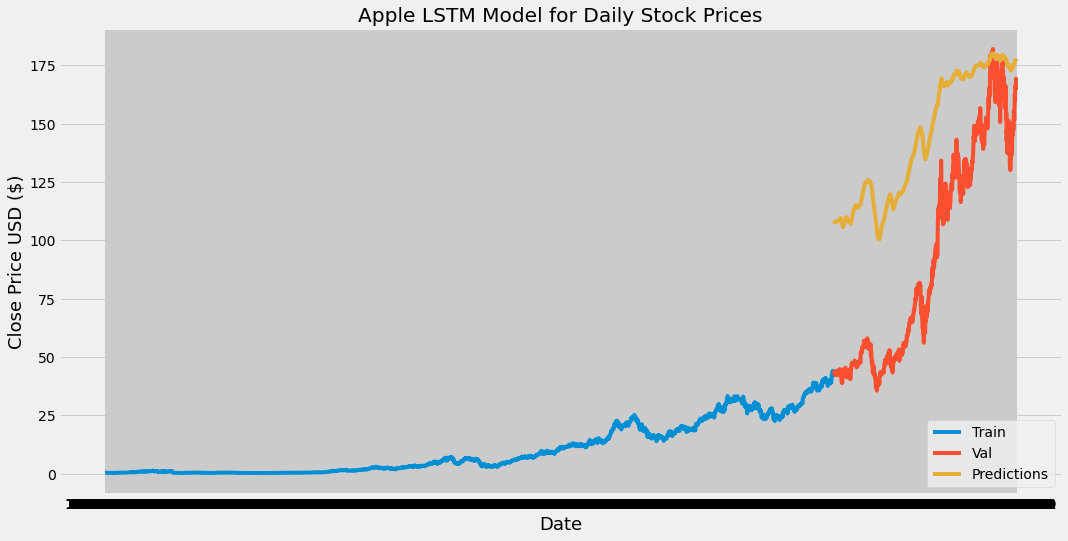

In [96]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Apple LSTM Model for Daily Stock Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_AAPL_daily_data['Close'])
plt.plot(valid_AAPL_daily_data[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [97]:
predicted_AAPL_daily = pd.DataFrame(predictions_AAPL_daily)
predicted_AAPL_daily.to_csv('predicted_closing_price_AAPL_daily.csv')

In [98]:
print('RMSE: ', rmse_AAPL_daily)
print('R2 Score: ', r2_score(y_test_AAPL_daily_data, predictions_AAPL_daily))
print('MAE: ', mean_absolute_error(y_test_AAPL_daily_data, predictions_AAPL_daily))

RMSE:  55.45638727660875
R2 Score:  -0.4715903410282971
MAE:  51.615851103223804


In [99]:
valid_AAPL_daily_data.head()

,Close,Predictions
Date,,
2017-11-21,43.285000,107.085564
2017-11-22,43.740002,107.251556
2017-11-24,43.742500,107.443855
2017-11-27,43.522499,107.624718
2017-11-28,43.267502,107.774673


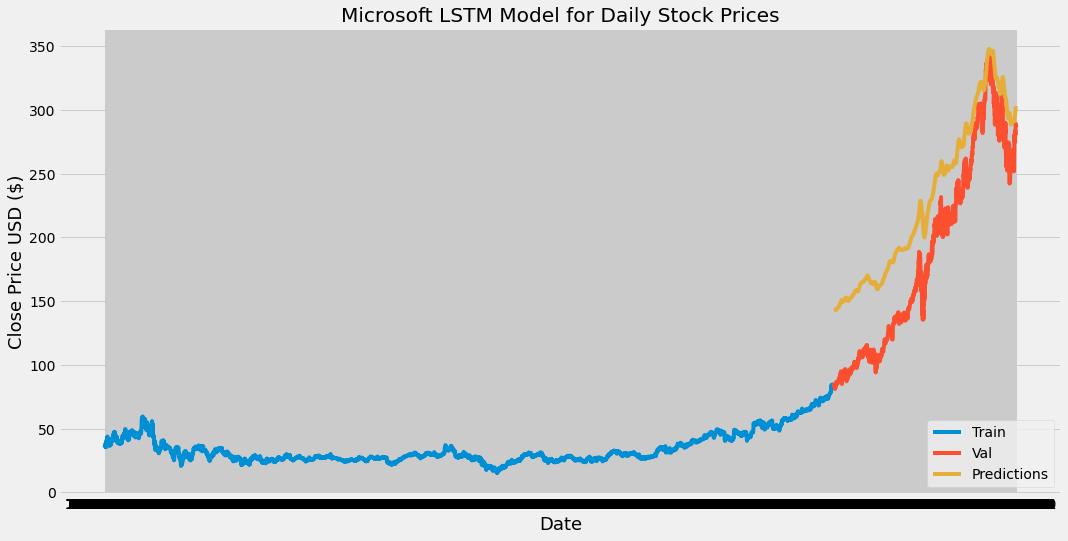

In [136]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Microsoft LSTM Model for Daily Stock Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_MSFT_daily_data['Close'])
plt.plot(valid_MSFT_daily_data[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
predicted_MSFT_daily = pd.DataFrame(predictions_MSFT_daily)
predicted_MSFT_daily.to_csv('predicted_closing_price_MSFT_daily.csv')

In [137]:
print('RMSE: ', rmse_MSFT_daily)
print('R2 Score: ', r2_score(y_test_MSFT_daily_data, predictions_MSFT_daily))
print('MAE: ', mean_absolute_error(y_test_MSFT_daily_data, predictions_MSFT_daily))

RMSE:  45.30420832436847
R2 Score:  0.6498236995059856
MAE:  42.669816408841015


In [51]:
valid_MSFT_daily_data.head()

,Close,Predictions
Date,,
2017-11-21,83.720001,140.792160
2017-11-22,83.110001,140.784698
2017-11-24,83.260002,140.769958
2017-11-27,83.870003,140.755814
2017-11-28,84.879997,140.763840


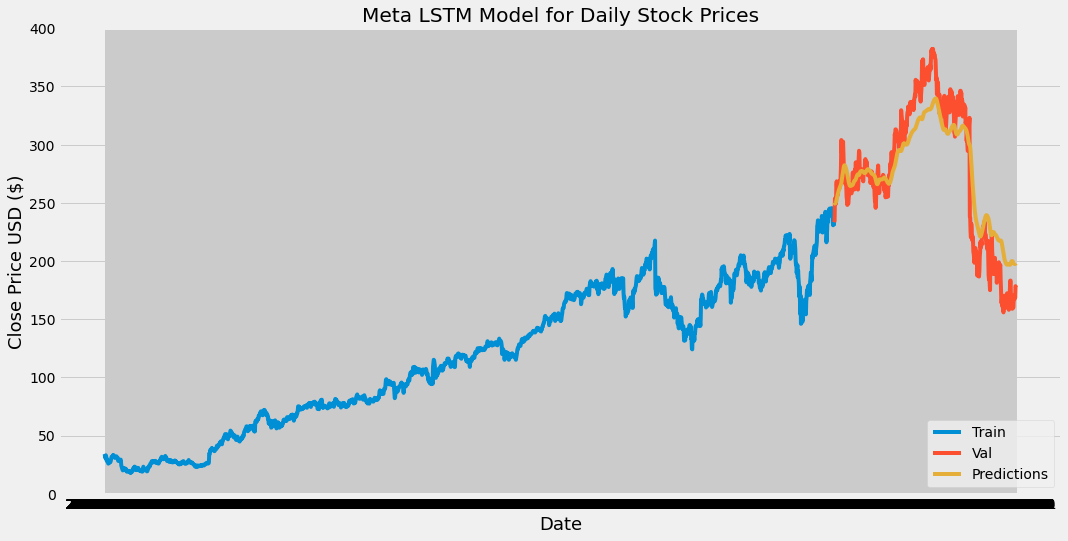

In [52]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Meta LSTM Model for Daily Stock Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_META_daily_data['Close'])
plt.plot(valid_META_daily_data[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [53]:
predicted_META_daily = pd.DataFrame(predictions_META_daily)
predicted_META_daily.to_csv('predicted_closing_price_META_daily.csv')

In [54]:
print('RMSE: ', rmse_META_daily)
print('R2 Score: ', r2_score(y_test_META_daily_data, predictions_META_daily))
print('MAE: ', mean_absolute_error(y_test_META_daily_data, predictions_META_daily))

RMSE:  24.223782071134988
R2 Score:  0.8370285348254054
MAE:  19.668925183776143


In [55]:
valid_META_daily_data.head()

,Close,Predictions
Date,,
2020-07-29,233.289993,250.315948
2020-07-30,234.500000,249.786148
2020-07-31,253.669998,249.330429
2020-08-03,251.960007,249.469864
2020-08-04,249.830002,250.004440


## Weekly Predictions

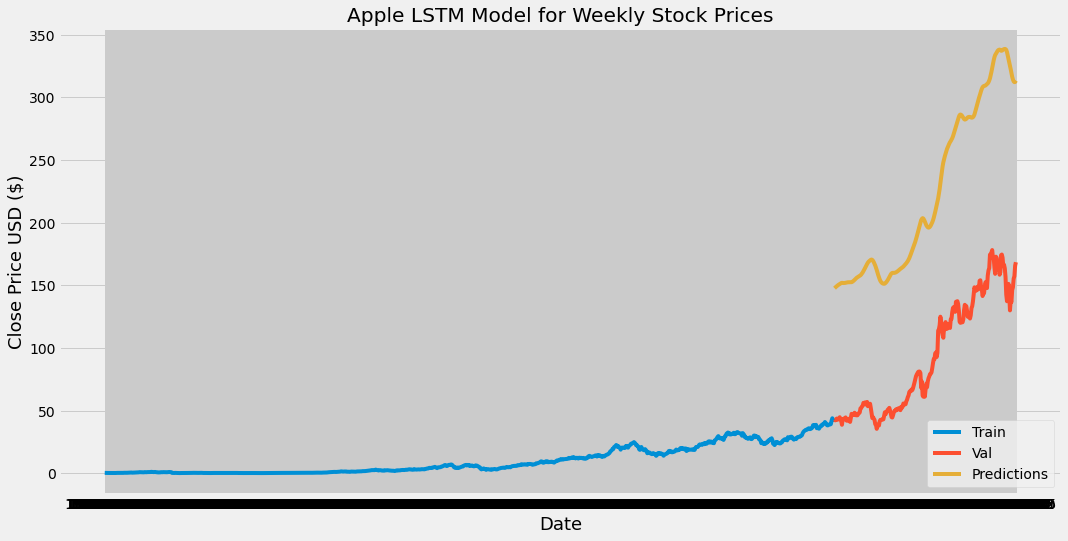

In [138]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Apple LSTM Model for Weekly Stock Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_AAPL_weekly_data['Close'])
plt.plot(valid_AAPL_weekly_data[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [69]:
predicted_AAPL_weekly = pd.DataFrame(predictions_AAPL_weekly)
predicted_AAPL_weekly.to_csv('predicted_closing_price_AAPL_weekly.csv')

In [57]:
print('RMSE: ', rmse_AAPL_weekly)
print('R2 Score: ', r2_score(y_test_AAPL_weekly_data, predictions_AAPL_weekly))
print('MAE: ', mean_absolute_error(y_test_AAPL_weekly_data, predictions_AAPL_weekly))

RMSE:  128.59909639120497
R2 Score:  -6.916973495648029
MAE:  126.64493812834651


In [58]:
valid_AAPL_weekly_data.head()

,Close,Predictions
Date,,
2017-11-24,42.962502,145.448776
2017-12-01,42.330002,146.076736
2017-12-08,43.055000,146.626785
2017-12-15,43.752499,147.142822
2017-12-22,42.770000,147.659225


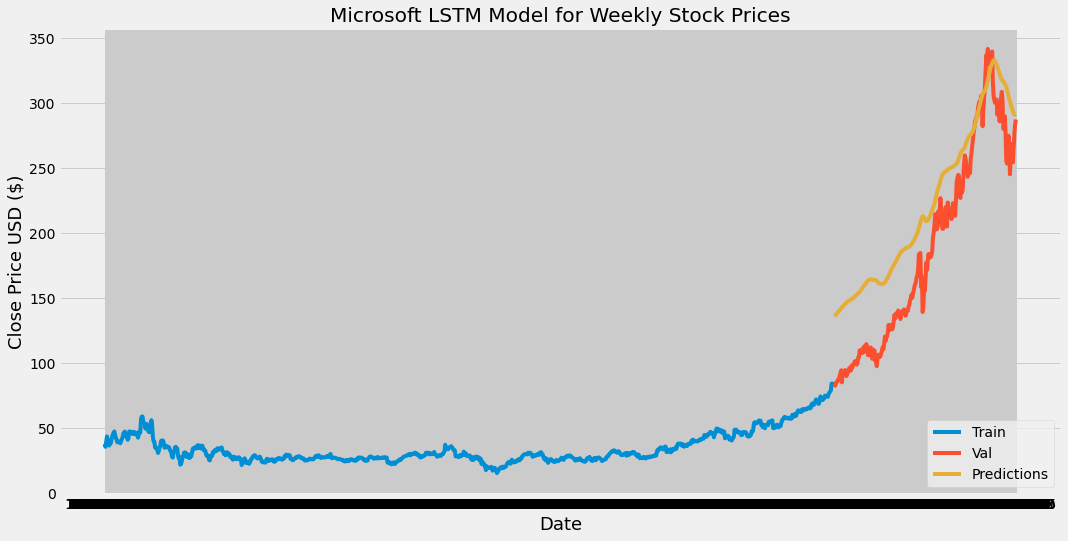

In [59]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Microsoft LSTM Model for Weekly Stock Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_MSFT_weekly_data['Close'])
plt.plot(valid_MSFT_weekly_data[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [60]:
predicted_MSFT_weekly = pd.DataFrame(predictions_MSFT_weekly)
predicted_MSFT_weekly.to_csv('predicted_closing_price_MSFT_weekly.csv')

In [61]:
print('RMSE: ', rmse_MSFT_weekly)
print('R2 Score: ', r2_score(y_test_MSFT_weekly_data, predictions_MSFT_weekly))
print('MAE: ', mean_absolute_error(y_test_MSFT_weekly_data, predictions_MSFT_weekly))

RMSE:  39.71289977004137
R2 Score:  0.7303441407337837
MAE:  36.07701294500286


In [62]:
valid_MSFT_weekly_data.head()

,Close,Predictions
Date,,
2017-11-24,84.169998,135.789139
2017-12-01,82.489998,136.547028
2017-12-08,84.690002,137.209610
2017-12-15,85.500000,137.852356
2017-12-22,85.720001,138.486298


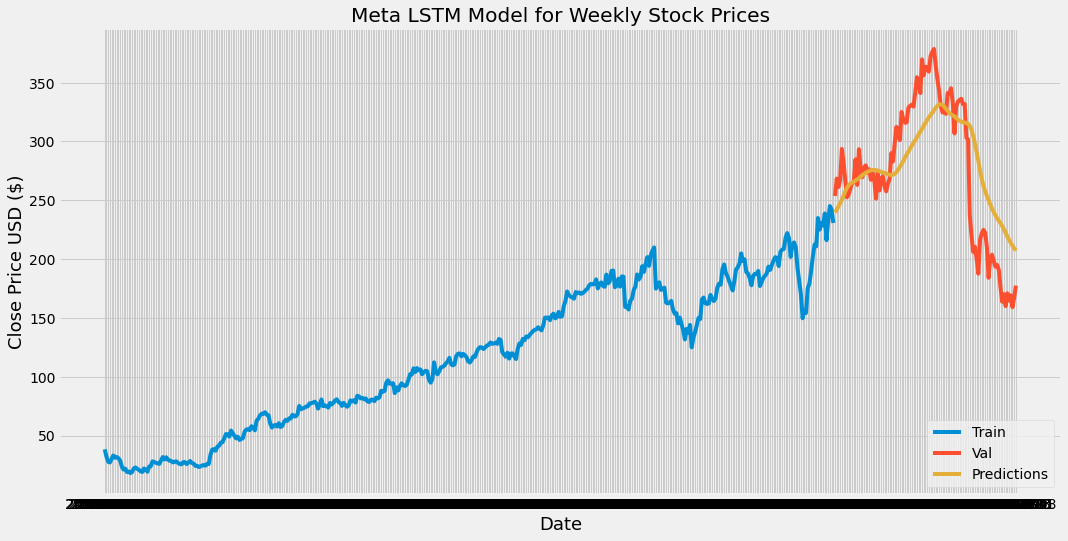

In [63]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Meta LSTM Model for Weekly Stock Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_META_weekly_data['Close'])
plt.plot(valid_META_weekly_data[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [64]:
predicted_META_weekly = pd.DataFrame(predictions_META_weekly)
predicted_META_weekly.to_csv('predicted_closing_price_META_weekly.csv')

In [65]:
print('RMSE: ', rmse_META_weekly)
print('R2 Score: ', r2_score(y_test_META_weekly_data, predictions_META_weekly))
print('MAE: ', mean_absolute_error(y_test_META_weekly_data, predictions_META_weekly))

RMSE:  37.772190140038234
R2 Score:  0.6080184907980604
MAE:  29.95717460072284


In [66]:
valid_META_weekly_data.head()

,Close,Predictions
Date,,
2020-07-27,253.669998,239.637711
2020-08-03,268.440002,241.926758
2020-08-10,261.239990,244.712021
2020-08-17,267.010010,247.556412
2020-08-24,293.660004,250.463623


## Monthly Predictions

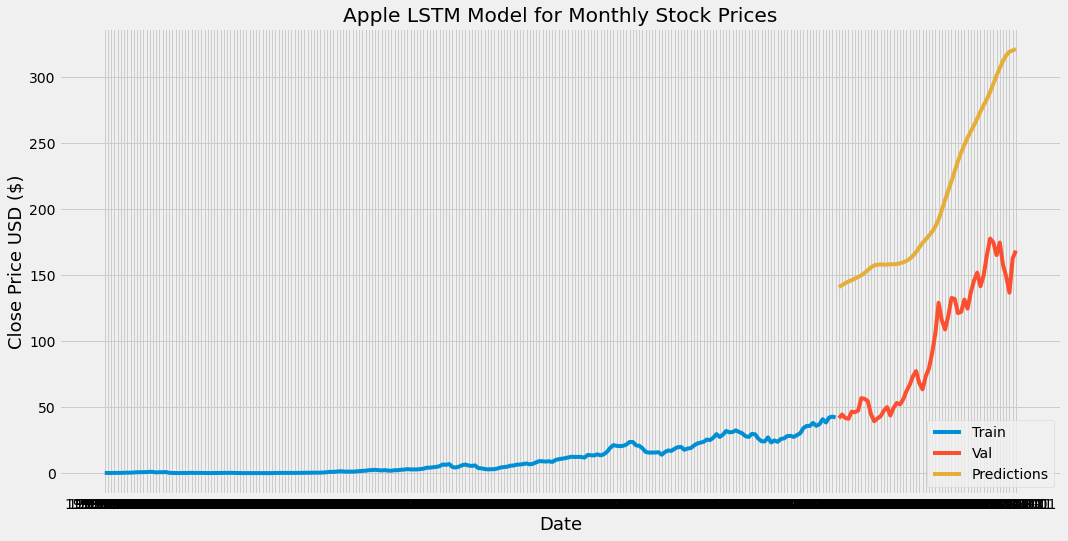

In [139]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Apple LSTM Model for Monthly Stock Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_AAPL_monthly_data['Close'])
plt.plot(valid_AAPL_monthly_data[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [68]:
predicted_AAPL_monthly = pd.DataFrame(predictions_AAPL_monthly)
predicted_AAPL_monthly.to_csv('predicted_closing_price_AAPL_monthly.csv')

In [69]:
print('RMSE: ', rmse_AAPL_monthly)
print('R2 Score: ', r2_score(y_test_AAPL_monthly_data, predictions_AAPL_monthly))
print('MAE: ', mean_absolute_error(y_test_AAPL_monthly_data, predictions_AAPL_monthly))

RMSE:  110.37454939016989
R2 Score:  -4.574262214494558
MAE:  108.50408663739884


In [70]:
valid_AAPL_monthly_data.head()

,Close,Predictions
Date,,
2018-01-01,41.857498,139.122681
2018-02-01,44.529999,140.571472
2018-03-01,41.945000,142.032379
2018-04-01,41.314999,143.289078
2018-05-01,46.717499,144.309479


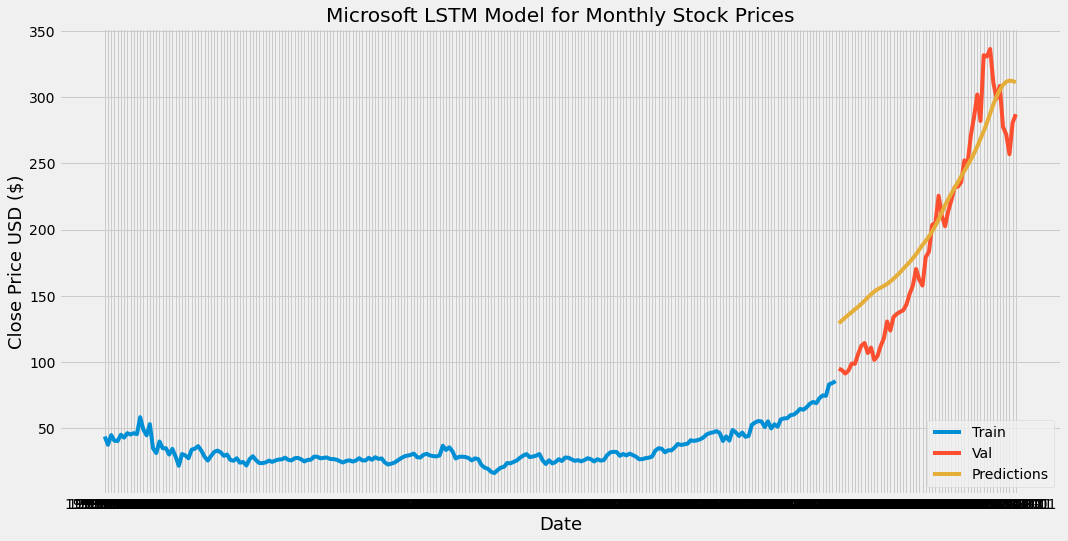

In [71]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Microsoft LSTM Model for Monthly Stock Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_MSFT_monthly_data['Close'])
plt.plot(valid_MSFT_monthly_data[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [72]:
predicted_MSFT_monthly = pd.DataFrame(predictions_MSFT_monthly)
predicted_MSFT_monthly.to_csv('predicted_closing_price_MSFT_monthly.csv')

In [73]:
print('RMSE: ', rmse_MSFT_monthly)
print('R2 Score: ', r2_score(y_test_MSFT_monthly_data, predictions_MSFT_monthly))
print('MAE: ', mean_absolute_error(y_test_MSFT_monthly_data, predictions_MSFT_monthly))

RMSE:  30.9124101702413
R2 Score:  0.8378639308987959
MAE:  26.48550004769461


In [74]:
valid_MSFT_monthly_data.head()

,Close,Predictions
Date,,
2018-01-01,95.010002,129.321182
2018-02-01,93.769997,131.390915
2018-03-01,91.269997,133.571945
2018-04-01,93.519997,135.653366
2018-05-01,98.839996,137.654221


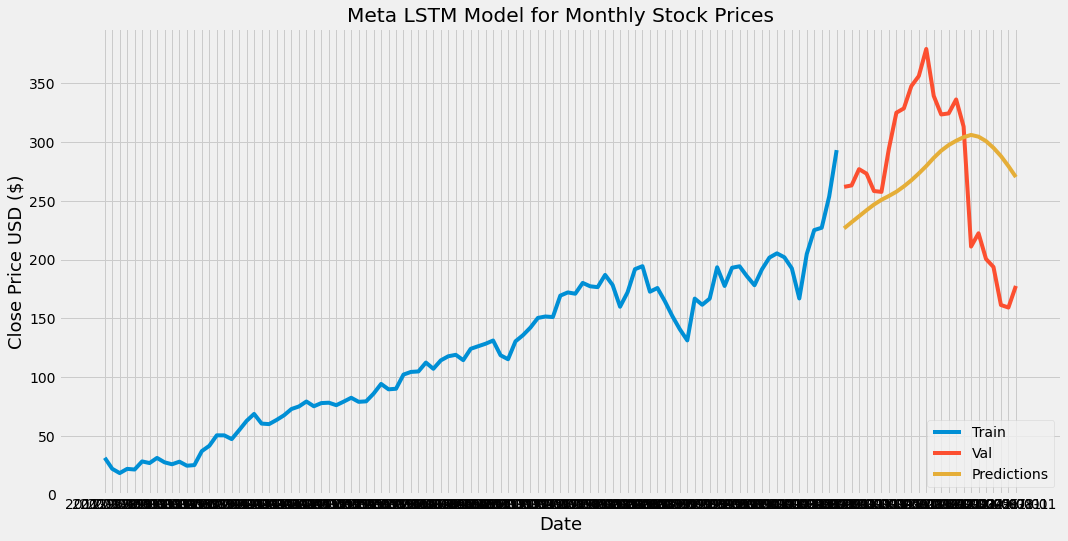

In [75]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Meta LSTM Model for Monthly Stock Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_META_monthly_data['Close'])
plt.plot(valid_META_monthly_data[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [79]:
predicted_META_monthly = pd.DataFrame(predictions_META_monthly)
predicted_META_monthly.to_csv('predicted_closing_price_META_monthly.csv')

In [76]:
print('RMSE: ', rmse_META_monthly)
print('R2 Score: ', r2_score(y_test_META_monthly_data, predictions_META_monthly))
print('MAE: ', mean_absolute_error(y_test_META_monthly_data, predictions_META_monthly))

RMSE:  70.723308881817
R2 Score:  -0.21802365863777196
MAE:  61.152441702677415


In [77]:
valid_META_monthly_data.head()

,Close,Predictions
Date,,
2020-09-01,261.899994,226.555801
2020-10-01,263.109985,231.771744
2020-11-01,276.970001,236.845459
2020-12-01,273.160004,241.968048
2021-01-01,258.329987,246.820602


## Save the LSTM model:

In [32]:
lstm_model.save("saved_model.h5")